In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from itertools import chain

# Load the concentric.mat file ....
M = scipy.io.loadmat('concentric.mat')
M = M["X"].T
bias  = [1] * 152
bias = np.array(bias).reshape((152,1))
d_mat = np.concatenate((M,bias),axis=1)

# Generate class variables for both the circles ....
class_0 = list(np.zeros((51,)))
class_1 = list(np.ones((101,)))
cs = list(chain(class_0,class_1))
actual_class = np.array(cs)
y = actual_class.reshape((1,152)).T

# Sigmoid and accuracy functions to be used for training ....
def activation_function(z):
    sigmoid_value = 1 / (1 + np.exp(-z))
    return sigmoid_value

def accuracy(y,pred):
    same = 0
    for i in range(len(y)):
        if y[i,0] == pred[i]:
            same = same+1
    return same/len(pred)


# np.random.seed(20)
wt_old = np.random.normal(0,1,9)
wt_old =  [[-0.47721803 , 0.88131804, -0.40467741],
 [-1.31386475 , 1.70957306, -0.54535995],
 [ 0.88462238,  0.05003364, -1.54647732]] #wt_old.reshape((3, 3))
print("Initial weights and bias at layer 1:", wt_old)
wt2_old = np.random.normal(0,1,4)
wt2_old = [[ 0.98236743],
 [-1.10106763],
 [-1.18504653],
 [-0.2056499 ]] #wt2_old.reshape((4, 1))
print("Initial weights and bias at layer 2:", wt2_old)
alpha = 0.05
error = []
accuracylist=[]
for i in range(2):

    sigmoid_value1 = activation_function(np.dot(d_mat, wt_old))
    sigmoid_value3=np.hstack([sigmoid_value1,bias])
    sigmoid_value2 = activation_function(np.dot(sigmoid_value3, wt2_old))


    error.append(np.sum(abs(sigmoid_value2 - y)))
    err = (y - sigmoid_value2) 

    delta_2 = err * (sigmoid_value2 * (1 - sigmoid_value2))
    print(delta_2,"delta2")
    wt2_old = wt2_old + alpha * np.dot(sigmoid_value3.T, delta_2)
    print(wt2_old,"wt2_old")

    delta_1 = np.dot(delta_2, wt2_old[0:3,:].T) * sigmoid_value1 * (1 - sigmoid_value1)
    wt_old = wt_old + alpha * d_mat.T.dot(delta_1)
    print(wt_old,"wt_old")
    print(sigmoid_value2,"sigmoid_value2")

    # Accuracy determination code...
    y_cap = [1 if x >= 0.5 else 0 for x in list(sigmoid_value2)]
    print(y_cap,"y_cap")
    acc = accuracy(y, y_cap)
    accuracylist.append(1-acc)
    print(accuracylist)

    if acc == 1:
        print("Neural Network Converges at iteration number: ", i)
        break

print("Final weights and bias at layer 1 are:", wt_old)
print("Final weights and bias at layer 2 are:", wt2_old)

Initial weights and bias at layer 1: [[-0.47721803, 0.88131804, -0.40467741], [-1.31386475, 1.70957306, -0.54535995], [0.88462238, 0.05003364, -1.54647732]]
Initial weights and bias at layer 2: [[0.98236743], [-1.10106763], [-1.18504653], [-0.2056499]]
[[-0.10322419]
 [-0.10266869]
 [-0.10268468]
 [-0.10173082]
 [-0.10084455]
 [-0.09986988]
 [-0.1000923 ]
 [-0.10103063]
 [-0.09985609]
 [-0.09944057]
 [-0.0997137 ]
 [-0.10061285]
 [-0.10056519]
 [-0.10038267]
 [-0.10029964]
 [-0.10133432]
 [-0.10177895]
 [-0.10195181]
 [-0.10259151]
 [-0.10341863]
 [-0.10426145]
 [-0.10480242]
 [-0.1054367 ]
 [-0.10615289]
 [-0.10678992]
 [-0.10723801]
 [-0.10796029]
 [-0.10801167]
 [-0.10919381]
 [-0.10910234]
 [-0.11042695]
 [-0.10978008]
 [-0.11002214]
 [-0.11011618]
 [-0.1113724 ]
 [-0.11062278]
 [-0.10955045]
 [-0.10952403]
 [-0.11037393]
 [-0.1096898 ]
 [-0.1094543 ]
 [-0.10836494]
 [-0.10806751]
 [-0.10779979]
 [-0.10681923]
 [-0.10651664]
 [-0.10589842]
 [-0.10523028]
 [-0.10458891]
 [-0.1037503

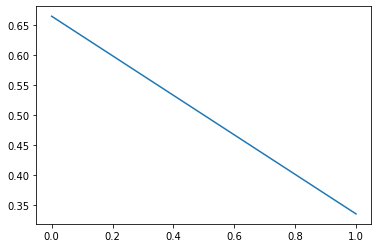

In [2]:
# Out of curiosity to see the behabiour of the linear error during the training process
# I have ploted the error at every iteration ... It is an interesting graph ...
plt.plot(accuracylist)
plt.show()

In [3]:
a=np.dot(np.array([[1,2]]),1-np.array([[3,2]]))

ValueError: shapes (1,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

In [ ]:
a

In [ ]:
np.array([3,4])*np.array([[1,2]])*(1-np.array([[3,2]]))